# Zebrafish single coiling model

### Below is the block of code to run single coiling models

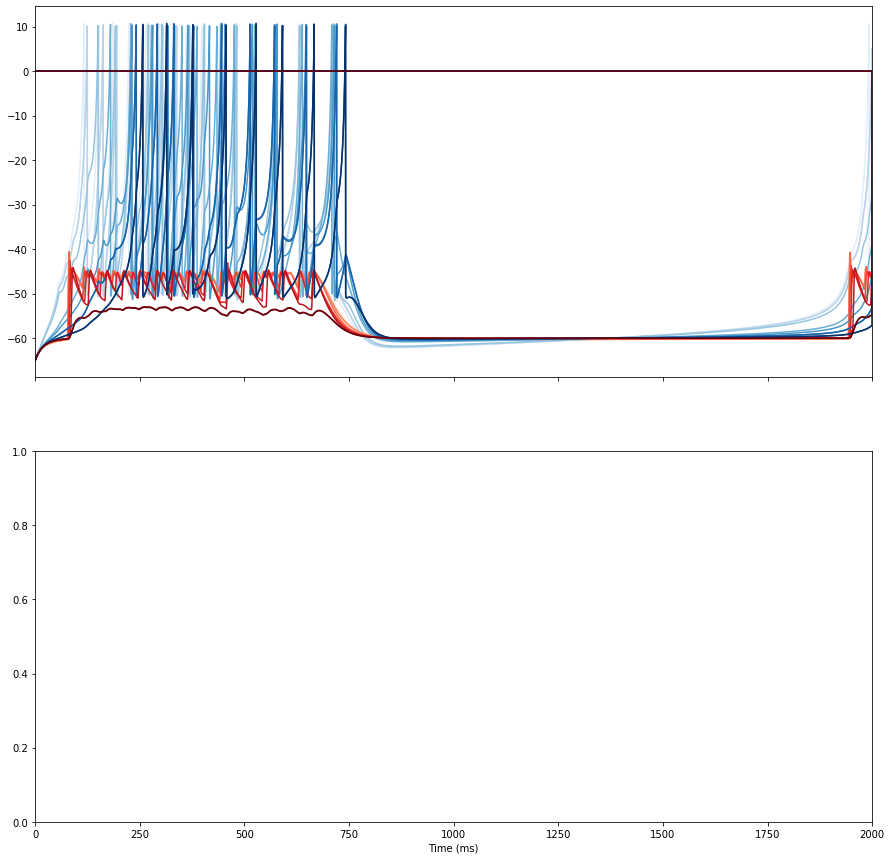

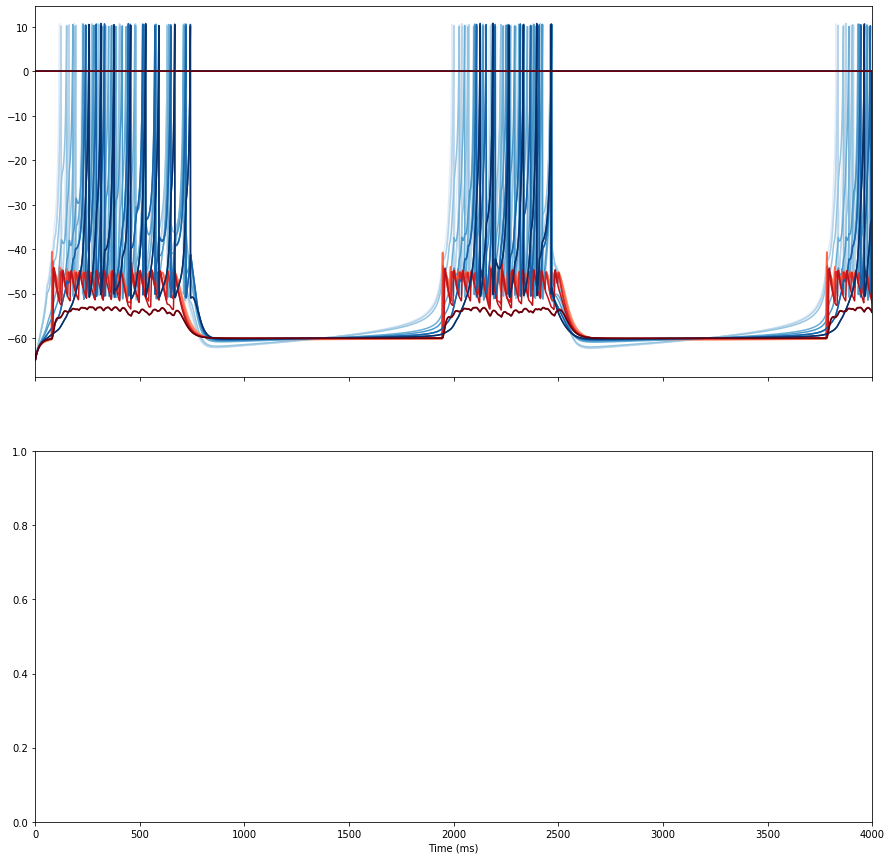

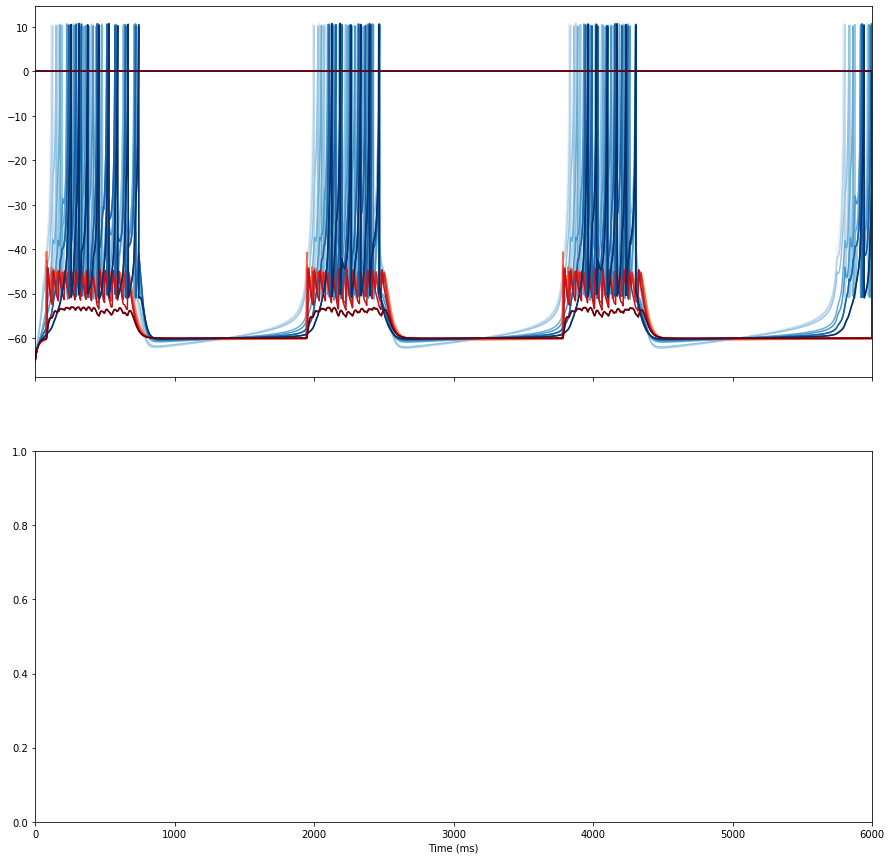

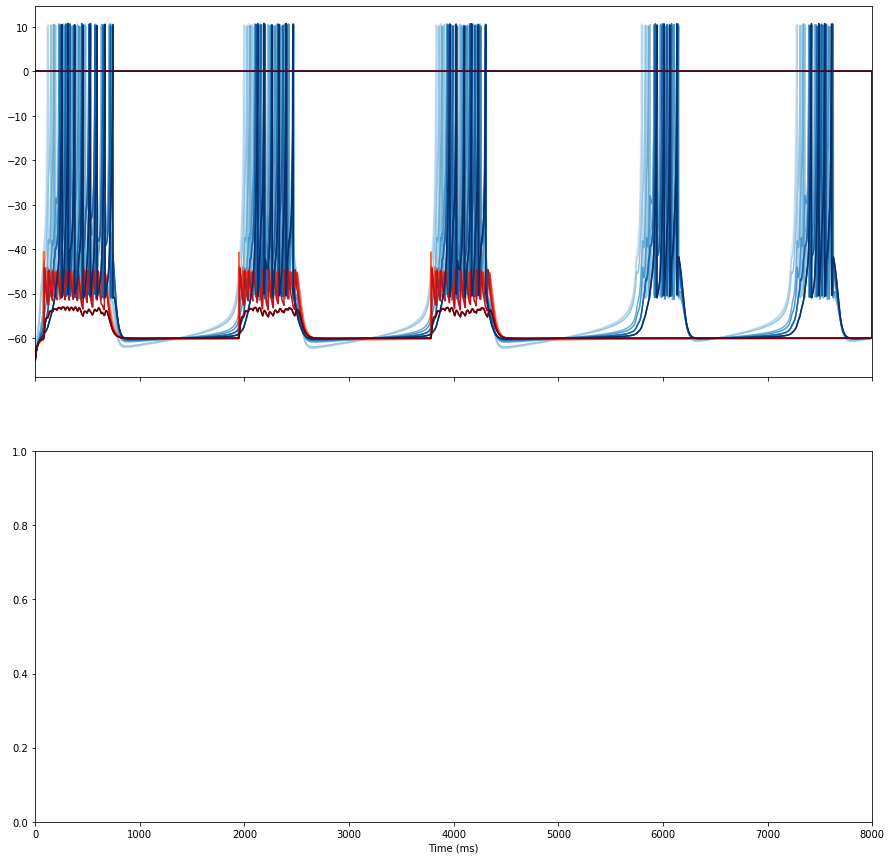

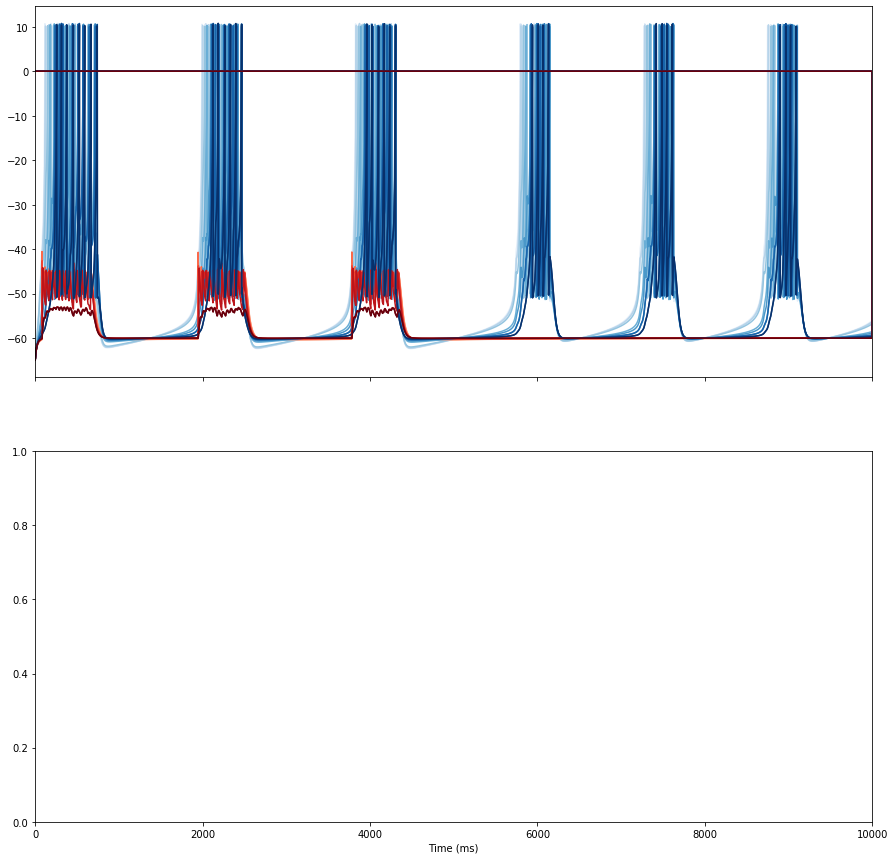

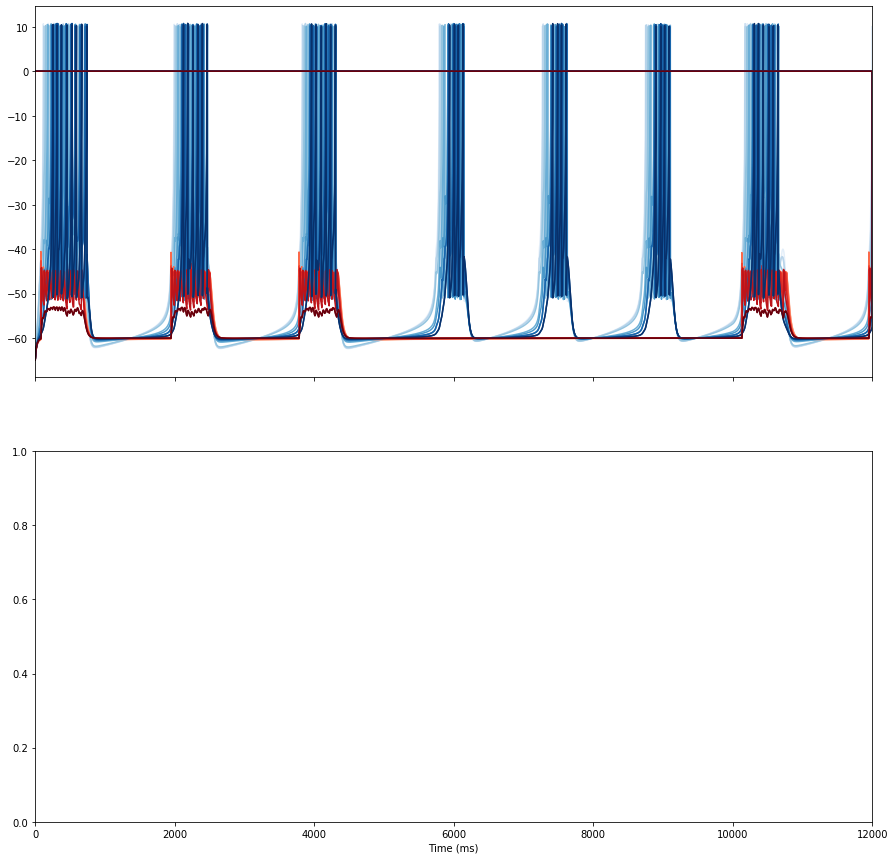

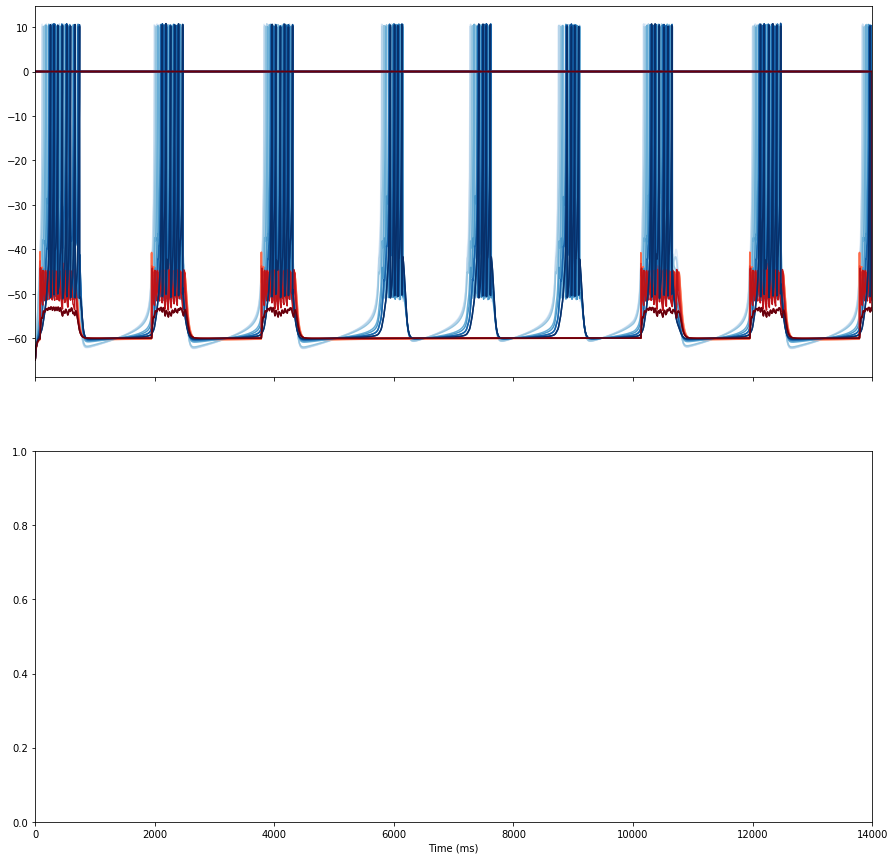

In [2]:
%matplotlib inline

### FIRST, choose which model to run by uncommenting the desired model

# Import connectome package
from Single_coiling import *

# The following model is to simulate the coiling model without any glycinergic inhibition
#from Single_coiling_glycine_null import *

# The following model is to test the effects of having only a single spike per IC burst
#from Single_coiling_single_IC_spike_per_burst import *

# The following model is to a 30 somite version of the single coiling model
#from Single_coiling_30_somites import *

# The following model is a IC null model
#from Single_coiling_IC_KO import *

# The following model is a MN null model
#from Single_coiling_MN_KO import *

# The following model is a V0d null model
from Single_coiling_V0d_KO import *


#Select the duration of the simulation
TIME_END = 15000


#To use with all 10-somite Coiling models
((VLIC, VRIC), (VLMN, VRMN), (VLV0d, VRV0d),
 (VLMuscle, VRMuscle), Time) = connectome_coiling(rand=0, stim0=50, sigma=0,
                                                   tmax=TIME_END, dt=0.1, E_gly=-45, cv=4,
                                                   nIC=5, nMN=10, nV0d=10, nMuscle=10)

#Coiling with 30 somites. Uncomment and comment others as needed
#((VLIC, VRIC), (VLMN, VRMN), (VLV0d, VRV0d), (VLMuscle, VRMuscle), Time) = connectome_coiling(rand=0, stim0=50, sigma=0,
#                                                   tmax=TIME_END, dt=0.1, E_gly=-45, cv=8, #cv=4
#                                                   nIC=5, nMN=30, nV0d=30, nMuscle=30)



#The code below produces a beeping sound af the code has been executed
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration) 

The code below is to save the simulation data into a .csv file that can be read into the notebook at a later time

In [3]:

# Import pandas for data saving
import pandas as pd

#List cell types
cell_names = ['IC', 'MN','V0d', 'Muscle']

#calculate the number of cell of each population
nIC = len(VLIC[:,0])
nMN = len(VLMN[:,0])
nV0d = len(VLV0d[:,0])
nMuscle = len(VLMuscle[:,0])
num_cells = [nIC, nMN, nV0d, nMuscle]

#List of membrane potential traces
Vdata_list =[VLIC, VRIC, VLMN, VRMN, VLV0d, VRV0d, VLMuscle, VRMuscle]

#Pandas dataframe that will contain the simulation results
Sim_data = pd.DataFrame(index=Time)

#Place data into a structure that will allow you to save it as .csv
for i in range(0, len(cell_names)):
    for j in range(0, num_cells[i]):
        header_name = 'Left_' + cell_names[i] + str(j)
        Sim_data.insert(len(Sim_data.columns), column = header_name, value = Vdata_list[i*2][j]) # insert a new column
    for k in range(0, num_cells[i]):
        header_name = 'Right_' + cell_names[i] + str(k)
        Sim_data.insert(len(Sim_data.columns), column = header_name, value = Vdata_list[i*2+1][k]) # insert a new column

#Save to csv.  Change name of the file as appropriate
Sim_data.to_csv("Single_coiling_V0d_KO.csv")

The code below allows you to import data from a previously run simulation of a SINGLE COILING MODEL that was saved into .csv

In [ ]:
# Import pandas for data saving
import pandas as pd
import numpy as np
from pylab import *
from Analysis_tools import *

# Read .csv file with sim data into a pandas dataframe
read_data = pd.read_csv("Single_coiling_Stim50_left_side_only_sigmaW_1pt00_3.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

#Calculate the number of cells in each population
for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

nIC, nMN, nV0d

This block of code is to trace membrane potential for all neurons

In [ ]:

%matplotlib inline

#Color maps for left and right trances
cmapL = matplotlib.cm.get_cmap('Blues')
cmapR = matplotlib.cm.get_cmap('Reds')
    
#Declare figure
fig, ax = plt.subplots(4,1, sharex=True, figsize=(10, 8)) 
plt.box(on=None)

#Font sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

#Line length and width
LINELENGTH = 1
LINEWIDTH = 2

# just adding fake plot for the legend
ax[0].plot([0], [0], c=cmapL(0.5))
ax[0].plot([0], [0], c=cmapR(0.5))


# plotting motoneuron traces
for k in range (0, nMN):
    lines_left, = ax[0].plot(Time, VLMN[k,:], c=cmapL((k+1)/nMN)) # adding a color gradient, lighter color -> rostrally located
    lines_right, = ax[0].plot(Time, VRMN[k,:], c=cmapR((k+1)/nMN))
#legend set-up
leg=ax[0].legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH)
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

#y-axis limits
lower_y = -80
upper_y = 20
for i in range (0,3):
    ax[i].set_ylabel('Vm (mV)') #y-axis title
    ax[i].set_ylim([lower_y, upper_y]) #y-axis limits
    #Remove borderse
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    #Tick parameters
    ax[i].tick_params(axis='both', which='both', length=0)
    ax[i].set_xticks([i*5000 for i in range(0,4)])
    ax[i].set_yticks([i*50 + -50 for i in range(0,2)])

# plotting IC traces. Set-up of the plot is the same as for MNs
cmapL = matplotlib.cm.get_cmap('Blues')
cmapR = matplotlib.cm.get_cmap('Reds')
ax[1].plot([0], [0], c=cmapL(0.5))
ax[1].plot([0], [0], c=cmapR(0.5))    

for k in range (0, nIC):
    lines_left, = ax[1].plot(Time, VLIC[k,:], c=cmapL((k+1)/nIC)) 
    lines_right, = ax[1].plot(Time, VRIC[k,:], c=cmapR((k+1)/nIC))
leg=ax[1].legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH)
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)
    
# plotting V0d traces. Set-up of the plot is the same as for MNs
cmapL = matplotlib.cm.get_cmap('Blues')
cmapR = matplotlib.cm.get_cmap('Reds')
ax[2].plot([0], [0], c=cmapL(0.5))
ax[2].plot([0], [0], c=cmapR(0.5))    

for k in range (0, nV0d):
    lines_left, = ax[2].plot(Time, VLV0d[k,:], c=cmapL((k+1)/nV0d)) 
    lines_right, = ax[2].plot(Time, VRV0d[k,:], c=cmapR((k+1)/nV0d))
leg=ax[2].legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH)
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# plotting muscles traces. Set-up of the plot is the same as for MNs
for k in range (0, nMuscle):
    lines_left, = ax[3].plot(Time, VLMuscle[k,:], c=cmapL((k+1)/nMuscle)) 
    lines_right, = ax[3].plot(Time, VRMuscle[k,:], c=cmapR((k+1)/nMuscle))
ax[3].legend(handles=[lines_left, lines_right], labels=['Left Muscles','Right Muscles'], loc='upper right')

plt.xlabel('Time (ms)') #x-axis label
plt.xlim([0, TIME_END]) #x-axis limit

plt.show()



# Animated plot
 Make an animation of the muscle output. NOTE: May not work if you don't have the correct MPEG writer on your computer

In [ ]:
%matplotlib notebook
%matplotlib notebook

mywriter = animation.FFMpegWriter()
# declare the discretization time of your simulation
dt = 0.1
# declare the number of somites in your model
nMuscle = 10
# declare the number of simulation time point
nmax = int(TIME_END)/dt 
ani = angles_(Time,nMuscle,nmax,VRMuscle,VLMuscle,dt)

In [ ]:
ani.save("Single_coiling_10_somites.mp4")

## Code to run multiple simulations as part of a sensitivity analysis 

In [ ]:
%matplotlib inline
# Import connectome package
from Single_coiling_with_sigmas import *
from Analysis_tools import *
import numpy as np
import pandas as pd

#Declare the duration of each simulation
TIME_END = 20000

#Declare the number of runs per sigma value
nSims = 5

#Declare the values of sigma to go through.  
sigmas = np.arange(1.0, 2.5, 0.5)
for s in sigmas:
    for p in range(nSims):
        (VLIC, VRIC), (VLMN, VRMN), (VLV0d, VRV0d), (VLMuscle, VRMuscle), Time = connectome_coiling(rand=p, stim0=50, 
                                                   sigmaD=0, sigmaL = s, sigmaP=0, sigmaW=0, #SELECT WHICH SIGMA TO VARY
                                                   tmax=TIME_END, dt=0.1, E_gly=-45, cv=4,
                                                   nIC=5, nMN=10, nV0d=10, nMuscle=10)
        #Code below is to plot the result
        nMN = len(VLMN[:,0]) #number of MNs
        #Color maps for left and right traces
        cmapL = matplotlib.cm.get_cmap('Blues')
        cmapR = matplotlib.cm.get_cmap('Reds')
        #Declare figure
        fig, ax = plt.subplots()
        #Declare borders
        right_side = ax.spines["right"]
        top_side = ax.spines["top"]
        right_side.set_visible(False)
        top_side.set_visible(False)
        # just adding fake plot for the legend
        ax.plot([0], [0], c=cmapL(0.5))
        ax.plot([0], [0], c=cmapR(0.5))
        # plotting muscle traces
        for k in range (0, nMN):
            ax.plot(Time, VLMN[k,:], c=cmapL((k+1)/nMN)) # adding a collor gradiant, darker color -> rostrally located
            ax.plot(Time, VRMN[k,:], c=cmapR((k+1)/nMN))
        plt.legend(['left_MN','right_MN'])
        plt.ylabel('a.u.')
        plt.xlabel('Time (ms)')
        plt.xlim([0,TIME_END])
        plt.show()
        #Count the number of coiling events
        Start, End, Duration = detect_event(VLMuscle, VRMuscle, Time, Threshold=0.5)
        Num_coils = len(Start)
        print("sigmaW = " + str(s) + "; run" + str(p))
        print(str(Num_coils))
        print(Duration)

        #Code below is to save data into a .csv format
        cell_names = ['IC', 'MN','V0d', 'Muscle']

        nIC = len(VLIC[:,0])
        nMN = len(VLMN[:,0])
        nV0d = len(VLV0d[:,0])
        nMuscle = len(VLMuscle[:,0])
        num_cells = [nIC, nMN, nV0d, nMuscle]

        Vdata_list =[VLIC, VRIC, VLMN, VRMN, VLV0d, VRV0d, VLMuscle, VRMuscle]

        Sim_data = pd.DataFrame(index=Time)

        for i in range(0, len(cell_names)):
            for j in range(0, num_cells[i]):
                header_name = 'Left_' + cell_names[i] + str(j)
                #Sim_data = pd.DataFrame(header_name, data_list[i,j])
                Sim_data.insert(len(Sim_data.columns), column = header_name, value = Vdata_list[i*2][j]) # insert a new column
            for k in range(0, num_cells[i]):
                header_name = 'Right_' + cell_names[i] + str(k)
                Sim_data.insert(len(Sim_data.columns), column = header_name, value = Vdata_list[i*2+1][k]) # insert a new column
        
        #Save to a data file. Change the name based upon your preference
        Sim_data.to_csv("Single_coiling_stim50 - " + "sigmaW = " + str(s) + "; run" + str(p) + ".csv")
        #RUN ANIMATION
        mywriter = animation.FFMpegWriter()
        nMuscle = 10
        dt = 0.1
        nmax = int(TIME_END/dt) 
        ani = angles_(Time,nMuscle,nmax,VRMuscle,VLMuscle,dt)
        #save animation
        ani.save("./Single_coiling_anim_stim50 -" + "sigmaW = " + str(s) + "; run" + str(p) + ".mp4")

### The block of code below enables the recalculation of muscle output based on different values of R and C for muscle cells

In [ ]:

%matplotlib notebook
%matplotlib notebook
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###
# This file was used to make the figure for all of the neuron traces during a typical double coil
read_data = pd.read_csv("Single_coiling_30_somites.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END


%matplotlib notebook
%matplotlib notebook

VLMuscle, VRMuscle = recalc_muscle_ouptut(VLMN, VRMN, Time, dt = 0.1, nMN = 30, nMuscle = 30, R = 25, C = 10, weight_MN_Muscle = 0.011)

mywriter = animation.FFMpegWriter()
nMuscle = 30
nmax = 500000
dt = 0.1
ani = angles_(Time,nMuscle,nmax,VRMuscle,VLMuscle,dt)

## Below is a block of code to run through many recalculation based on different values of weights, R and C values
''' 
Weights = [0.025 + i*0.025 for i in range(0, 8)]

for R_val in range(1, 10, 2): # Declare which R values to go through
    for C_val in range(11, 20, 2): # Declare which C values to go through
        for Weight in Weights:

            %matplotlib notebook

            mywriter = animation.FFMpegWriter()
            nMuscle = 15
            dt = 0.1
            nmax = int(TIME_END/dt)
            ani = angles_(Time[0:nmax],nMuscle,nmax,VRMuscle,VLMuscle,dt)
            
            filename = './BnG_R_' + str(R_val)+ 'C_' + str(C_val)+ 'weight_0pt0' + str(int(Weight*1000)) + '.mp4'
            ani.save(filename)
'''